In [161]:
import investpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [106]:
stock_basket = ['Apple','Microsoft','Amazon','Alphabet','Tesla','Alphabet','NVIDIA','PayPal Holdings','Adobe']

In [107]:
def get_percentage(df):
    maximum = df['Open'].max()
    minimum = df['Open'].min()
    df['percentage'] = (df['Open']-minimum)/(maximum-minimum)

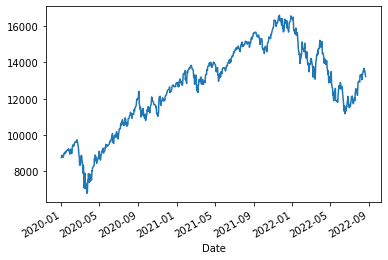

In [108]:
nas_results = investpy.search_quotes(text = 'NASDAQ 100',products = ['Indices'],countries=['united states'],n_results=1)
nas = nas_results.retrieve_historical_data(from_date='01/01/2020',to_date='22/08/2022')
nas['Open'].plot()
#nas.to_csv('nas.csv')
get_percentage(nas)

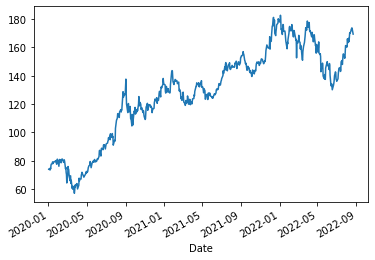

In [109]:
AAPL_results = investpy.search_quotes(text = 'apple',products = ['stocks'],countries=['united states'],n_results=1)
AAPL = AAPL_results.retrieve_historical_data(from_date='01/01/2020',to_date='22/08/2022')
AAPL['Open'].plot()
#AAPL.to_csv("AAPL.csv")
get_percentage(AAPL)

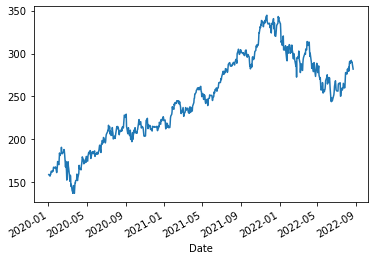

In [110]:
MSFT_results = investpy.search_quotes(text = 'Microsoft',products = ['stocks'],countries=['united states'],n_results=1)
MSFT = MSFT_results.retrieve_historical_data(from_date = '01/01/2020',to_date='22/08/2022')
MSFT['Open'].plot()
#MSFT.to_csv("MSFT.csv")
get_percentage(MSFT)

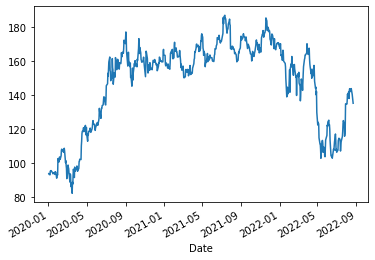

In [111]:
AMZN_results = investpy.search_quotes(text = 'Amazon',products = ['stocks'],countries=['united states'],n_results=1)
AMZN = AMZN_results.retrieve_historical_data(from_date = '01/01/2020',to_date='22/08/2022')
#AMZN.to_csv("AMZN.csv")
AMZN['Open'].plot()
get_percentage(AMZN)

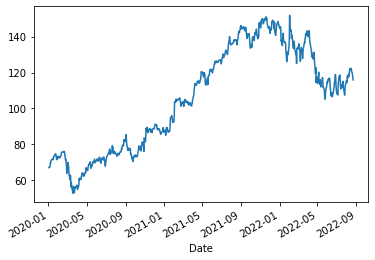

In [112]:
GOOG_results = investpy.search_quotes(text = 'Alphabet',products = ['stocks'],countries=['united states'],n_results=1)
GOOG = GOOG_results.retrieve_historical_data(from_date = '01/01/2020',to_date='22/08/2022')
#GOOG.to_csv("GOOG.csv")
GOOG['Open'].plot()
get_percentage(GOOG)

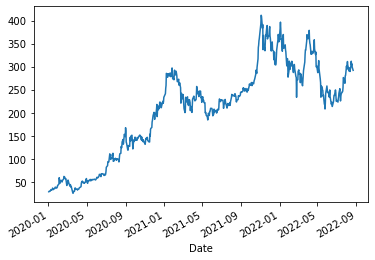

In [113]:
TSLA_results = investpy.search_quotes(text = 'Tesla',products = ['stocks'],countries=['united states'],n_results=1)
TSLA = TSLA_results.retrieve_historical_data(from_date = '01/01/2020',to_date='22/08/2022')
TSLA.to_csv("GOOG.csv")
TSLA['Open'].plot()
get_percentage(TSLA)

In [114]:
# x是一個行向量
x = np.array([1, 3, 564, 675, 6567]).reshape(1, -1)
print(x)
# y1、y2都是行向量
y1 = np.array([1, 3, 555555, 675, 6567]).reshape(1, -1)
y2 = 2*x+4

# 兩個行向量拼接到一起，形成一個兩行的矩陣
x_y1 = np.r_[x, y1]
x_y2 = np.r_[x, y2]

print(x_y1)
# 注意使用np.corrcoef求相關係數時
# 求取得到的是任意兩行的相關係數構成的相關係數矩陣
# 所以一定要把想求的兩個向量分別放在不同的行，而不是列
c_x_y1 = np.corrcoef(x_y1)
print(c_x_y1)

# 由於y2 = 2*x+4，相關係數c_x_y2必定等於1
c_x_y2 = np.corrcoef(x_y2)[0, 1]
print(c_x_y2)


[[   1    3  564  675 6567]]
[[     1      3    564    675   6567]
 [     1      3 555555    675   6567]]
[[ 1.         -0.18724527]
 [-0.18724527  1.        ]]
1.0


In [115]:
AAPL['date']=AAPL.index
nas['date']=nas.index
del_row = []
for i in range(len(nas)):
    if(nas['date'][i] not in list(AAPL['date'])):
        del_row.append(nas['date'][i])

for i in del_row:
    nas.drop(index=i,axis=0,inplace=True)

In [116]:
def correlation_cal(l1,l2):
    nl1 = np.array(l1).reshape(1,-1)
    nl2 = np.array(l2).reshape(1,-1)
    stack_list = np.r_[nl1,nl2]
    co = np.corrcoef(stack_list)[0,1]
    return co

In [117]:
print(nas.index)

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
               '2022-08-15', '2022-08-16', '2022-08-17', '2022-08-18',
               '2022-08-19', '2022-08-22'],
              dtype='datetime64[ns]', name='Date', length=665, freq=None)


In [144]:
correlation = []
a=[]
b=[]
c=[]
d=[]
e=[]
for i in range(0,50,5):
    for j in range(0,50,5):
        for k in range(0,50,5):
            for l in range(0,50,5):
                for m in range(0,50,5):
                    if(i+k+j+l+m)!=100:
                        continue
                    else:
                        w = (i/100)*AAPL['percentage']+(j/100)*MSFT['percentage']+(k/100)*AMZN['percentage']+(l/100)*GOOG['percentage']+(m/100)*TSLA['percentage']
                        corr = correlation_cal(w,nas['percentage'])
                        correlation.append(corr)
                        a.append(i)
                        b.append(j)
                        c.append(k)
                        d.append(l)
                        e.append(m)

df_correlation = pd.DataFrame({"correlatoin":correlation,"AAPL":a,"MSFT":b,"AMZN":c,"GOOG":d,"TSLA":e})
df_correlation.sort_values(by=["correlatoin"],ascending=False,inplace=True)

In [145]:
df_correlation.to_csv("correlation.csv")

In [146]:
df_correlation

,correlatoin,AAPL,MSFT,AMZN,GOOG,TSLA
20,0.991853,0,0,35,45,20
62,0.991787,0,5,35,40,20
659,0.991733,5,0,35,40,20
19,0.991703,0,0,35,40,25
660,0.991688,5,0,35,45,15
...,...,...,...,...,...,...
5283,0.929727,45,0,0,10,45
5073,0.928876,40,15,0,0,45
5470,0.928627,45,15,0,0,40
5352,0.927715,45,5,0,5,45


In [147]:
temp = pd.Series(0.35*AMZN['percentage']+0.45*GOOG['percentage']+0.2*TSLA['percentage'])

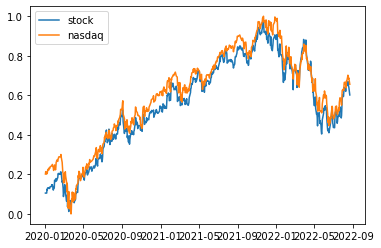

In [165]:
plt.plot(nas.index,temp,label='stock')
plt.plot(nas.index,nas['percentage'],label='nasdaq')
plt.legend()